## Problem set 1, Intro to NLP 2018

#### This is due on September 25, 2018, submitted electronically. 100 points total.

##### How to do this problem set:

- What version of Python should I use? 3.6!

- Most of these questions require writing Python code and computing results, and the rest of them have textual answers. To generate the answers, you will have to fill out a supporting file, `hw1.py`.

- For all of the textual answers you have to fill out have placeholder text which says "Answer in one or two sentences here." For each question, you need to replace "Answer in one or two sentences here" with your answer.

- Write all the answers in this ipython notebook. Once you are finished (1) Generate a PDF via (File -> Download As -> PDF) and upload to Gradescope (2)Turn in `hw_1.py` and `hw_1.ipynb` on Moodle.
  
- **Important** check your PDF before you turn it in to gradescope to make sure it exported correctly. If ipython notebook gets confused about your syntax it will sometimes terminate the PDF creation routine early. If your whole PDF does not print, try running `$jupyter nbconvert --to pdf 2018hw1.ipynb` to identify and fix any syntax errors that might be causing problems

- When creating your final version of the PDF to hand in, please do a fresh restart and execute every cell in order. Then you'll be sure it's actually right. One handy way to do this is by clicking `Cell -> Run All` in the notebook menu.
 
- This assignment is designed so that you can run all cells in a few minutes of computation time. If it is taking longer than that, you probably have made a mistake in your code.

##### Academic honesty 

- We will audit the Moodle code from a set number of students, chosen at random. The audits will check that the code you wrote and turned on Moodle generates the answers you turn in on your PDF. If you turn in correct answers on your PDF without code that actually generates those answers, we will consider this a serious case of cheating. See the course page for honesty policies.

- We will also run automatic checks of code on Moodle for plagiarism. Copying code from others is also considered a serious case of cheating.

In [3]:
# Run this cell! It sets some things up for you.

# This code makes plots appear inline in this document rather than in a new window.
import matplotlib.pyplot as plt
from __future__ import division  # this line is important to avoid unexpected behavior from division

# This code imports your work from hw_1.py
from model import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 4) # set default size of plots

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
PATH_TO_DATA = 'lyrics'

RAP_POS_LABEL = 'popular_rap'
RAP_NEG_LABEL = 'unpopular_rap'
COUNTRY_POS_LABEL = 'popular_country'
COUNTRY_NEG_LABEL = 'unpopular_country'

RAP_DIR = os.path.join(PATH_TO_DATA, "rap")
COUNTRY_DIR = os.path.join(PATH_TO_DATA, "country")

RAP_TRAIN_DIR = os.path.join(RAP_DIR, "train")
RAP_TEST_DIR = os.path.join(RAP_DIR, "test")
COUNTRY_TRAIN_DIR = os.path.join(COUNTRY_DIR, "train")
COUNTRY_TEST_DIR = os.path.join(COUNTRY_DIR, "test")

for label in [RAP_POS_LABEL, RAP_NEG_LABEL]:
    print(label)
    if label == RAP_POS_LABEL:
        print(os.listdir(RAP_TRAIN_DIR + "/" + label))
        for file in os.listdir(RAP_TRAIN_DIR + "/" + label):
            string = file.split('+')
            print(string)
        if len(os.listdir(RAP_TRAIN_DIR + "/" + label)) == 12:
            print("Great! You have 12 {} reviews in {}".format(label, RAP_TRAIN_DIR + "/" + label))
        else:
            print("Oh no! Something is wrong. Check your code which loads the reviews")
    else:
        print(os.listdir(RAP_TRAIN_DIR + "/" + label))
        if len(os.listdir(RAP_TRAIN_DIR + "/" + label)) == 7:
            print("Great! You have 7 {} reviews in {}".format(label, RAP_TRAIN_DIR + "/" + label))
        else:
            print("Oh no! Something is wrong. Check your code which loads the reviews")

popular_rap
['childish+gambino-freaks+and+geeks.txt', 'lil+pump-gucci+gang.txt', 'kanye+west-blood+on+the+leaves.txt', 'lil+pump-flex+like+ouu.txt', 'lil+pump-drug+addict.txt', 'eminem-renegade.txt', 'tyler+the+creator-911+mr+lonely.txt', 'aer-above+my+floor.txt', 'kendrick+lamar-humble.txt', '.DS_Store', 'chance+the+rapper-no+problem.txt', 'jay+z-99+problems.txt', 'meek+mill-on+me.txt', 'kendrick+lamar-swimming+pools.txt', 'nicki+minaj-chun+li.txt', 'nwa-chin+check.txt', 'kodak+black-calling+my+spirit.txt', 'aer-pretty+lady+around+me.txt', 'travis+scott-sicko+mode.txt', 'lil+pump-boss.txt', 'nicki+minaj-barbie+tingz.txt', 'tyler+the+creator-who+dat+boy+feat+aap+rocky.txt', 'kanye+west-famous.txt', 'chance+the+rapper-my+own+thing.txt', 'tyler+the+creator-see+you+again.txt', 'aer-whatever+we+want.txt', 'kanye+west-gold+digger.txt', 'drake-nonstop.txt', 'aer-wont+laugh.txt', '6ix9ine-tic+toc.txt', 'chance+the+rapper-all+we+got.txt', 'tyler+the+creator-boredom.txt', 'childish+gambino-cali

In [5]:
# Actually reading the data you are working with is an important part of NLP! Let's look at one of these reviews

print (open(TRAIN_DIR + "/neg/98_1.txt").read())

NameError: name 'TRAIN_DIR' is not defined

## Part One: Intro to NLP in Python: types, tokens and Zipf's law

#### Types and tokens

One major part of any NLP project is word tokenization. Word tokenization is the task of segmenting text into individual words, called tokens. In this assignment, we will use simple whitespace tokenization. Take a look at the `tokenize_doc` function in `hw_1.py`. **You should not modify tokenize_doc** but make sure you understand what it is doing.

In [4]:
# We have provided a tokenize_doc function in hw_1.py. Here is a short demo of how it works

d1 = "This SAMPLE doc has   words tHat  repeat repeat"
bow = tokenize_doc(d1)

assert bow['this'] == 1
assert bow['sample'] == 1
assert bow['doc'] == 1
assert bow['has'] == 1
assert bow['words'] == 1
assert bow['that'] == 1
assert bow['repeat'] == 2

bow2 = tokenize_doc("CMPSCI 585 is already my favorite class this semester!")
for b in bow2:
    print (b)

cmpsci
585
is
already
my
favorite
class
this
semester!


Now we are going to look at the word types and word tokens in the corpus.
Use the `word_counts` dictionary variable to store the count of each word in the corpus.
Use the `tokenize_doc` function to break documents into tokens. **You should not modify tokenize_doc** but make sure you understand what it is doing.

**Question 1.1 (5 points)**

Complete the cell below to fill out the `word_counts` dictionary variable. `word_counts` keeps track of how many times a word type appears across the corpus. For instance, `word_counts["movie"]` should store the number 61492 -- the count of how many times the word `movie` appears in the corpus.

In [22]:
import glob
import codecs
from collections import Counter

word_counts = Counter() # Counters are often useful for NLP in python

corpus = ''
for label in [RAP_POS_LABEL, RAP_NEG_LABEL]:
    for directory in [RAP_TRAIN_DIR, RAP_TEST_DIR]:
        for fn in glob.glob(directory + "/" + label + "/*txt"):
            print(fn)
            doc = codecs.open(fn, encoding = "ISO-8859-1") # Open the file with UTF-8 encoding
            corpus += doc.read() + ' '
    
word_counts = Counter(tokenize_doc(corpus))

lyrics/rap/train/popular_rap/childish+gambino-freaks+and+geeks.txt
lyrics/rap/train/popular_rap/lil+pump-gucci+gang.txt
lyrics/rap/train/popular_rap/kanye+west-blood+on+the+leaves.txt
lyrics/rap/train/popular_rap/lil+pump-flex+like+ouu.txt
lyrics/rap/train/popular_rap/lil+pump-drug+addict.txt
lyrics/rap/train/popular_rap/eminem-renegade.txt
lyrics/rap/train/popular_rap/tyler+the+creator-911+mr+lonely.txt
lyrics/rap/train/popular_rap/aer-above+my+floor.txt
lyrics/rap/train/popular_rap/kendrick+lamar-humble.txt
lyrics/rap/train/popular_rap/chance+the+rapper-no+problem.txt
lyrics/rap/train/popular_rap/jay+z-99+problems.txt
lyrics/rap/train/popular_rap/meek+mill-on+me.txt
lyrics/rap/train/popular_rap/kendrick+lamar-swimming+pools.txt
lyrics/rap/train/popular_rap/nicki+minaj-chun+li.txt
lyrics/rap/train/popular_rap/nwa-chin+check.txt
lyrics/rap/train/popular_rap/kodak+black-calling+my+spirit.txt
lyrics/rap/train/popular_rap/aer-pretty+lady+around+me.txt
lyrics/rap/train/popular_rap/travis+s

In [23]:
# you should see 61492 instances of the word type "movie" in the corpus. 
if word_counts["movie"] == 61492:
    print ("yay! there are {} total instances of the word type movie in the corpus".format(word_counts["movie"]))
else:
    print ("hmm. Something seems off. Double check your code")

hmm. Something seems off. Double check your code


**Question 1.2 (5 points)**

Take a look at the following values:

In [24]:
print ("there are {} word types in the corpus".format(n_word_types(word_counts)))
print ("there are {} word tokens in the corpus".format(n_word_tokens(word_counts)))

there are 7418 word types in the corpus
there are 58810 word tokens in the corpus


You should see a much higher number of tokens than types. Why is that?

Word types are the distinct words that appear in the corpus and the word tokens are the number of times each word type appears in the corpus. 

**Question 1.3 (5 points)**

Using the word_counts dictionary you just created, make a new dictionary called sorted_dict where the words are sorted according to their counts, in decending order:

In [25]:
import operator
sorted_dict = sorted(word_counts.items(), key=operator.itemgetter(1), reverse=True)

Now print the first 30 values from sorted_dict. 

In [26]:
for i in range(30):
    print(sorted_dict[i])


('the', 2486.0)
('i', 2048.0)
('you', 1411.0)
('a', 1287.0)
('to', 1205.0)
('and', 976.0)
('my', 887.0)
('it', 826.0)
('me', 820.0)
('in', 801.0)
('that', 653.0)
("i'm", 617.0)
('on', 568.0)
('up', 539.0)
('of', 507.0)
('like', 476.0)
('we', 471.0)
('with', 435.0)
('got', 389.0)
('your', 388.0)
('but', 387.0)
('is', 381.0)
('all', 375.0)
('so', 360.0)
("don't", 350.0)
('for', 350.0)
('get', 342.0)
('this', 336.0)
('no', 325.0)
('be', 301.0)


#### Zipf's Law

**Question 1.4 (5 points)**

In this section, you will verify a key statistical properties of text: [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law).

Zipf's Law describes the relations between the frequency rank of words and frequency value of words.  For a word $w$, its frequency is inversely proportional to its rank:

$$count_w = K \frac{1}{rank_w}$$
or in other words
$$\log(count_w) = K - \log(rank_w)$$

for some constant $K$, specific to the corpus and how words are being defined.

Therefore, if Zipf's Law holds, after sorting the words descending on frequency, word frequency decreases in an approximately linear fashion under a log-log scale.

Please make such a log-log plot by ploting the rank versus frequency **Hint: Make use of the sorted dictionary you just created.**.  Use a scatter plot where the x-axis is the *log(rank)*, and y-axis is *log(frequency)*.  You should get this information from `word_counts`; for example, you can take the individual word counts and sort them.  dict methods `.items()` and/or `values()` may be useful.  (Note that it doesn't really matter whether ranks start at 1 or 0 in terms of how the plot comes out.) You can check your results by comparing your plots to ones on Wikipedia; they should look qualitatively similar.

*Please remember to label the meaning of the x-axis and y-axis.*

Text(0, 0.5, 'log(frequency)')

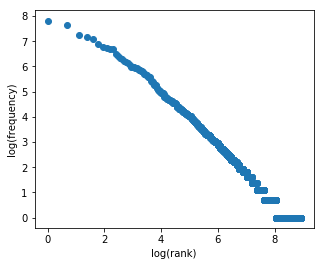

In [27]:
import math
import operator
x = []
y = []
X_LABEL = "log(rank)"
Y_LABEL = "log(frequency)"

for i in range(len(sorted_dict)):
    x += [math.log(i+1)]
    y += [math.log(sorted_dict[i][1])]

plt.scatter(x, y)
plt.xlabel(X_LABEL)
plt.ylabel(Y_LABEL)

**Question 1.5 (5 points)**

You should see some discontinuities on the left and right sides of this figure.  Why are we seeing them on the left?  Why are we seeing them on the right?  On the right, what are those "ledges"?

We are seeing discontinuities on the left and right due to the nature of log growth. As x goes to 1 in log(x), the the growth of log(x) to log(x+1) is large. The ledges on the right are the infrequent words. There are many words that show up only once or twice in the text, and the large amounts of them create a ledge in the graph.

## Part Two: Naive Bayes

This section of the homework will walk you through coding a Naive Bayes classifier that can distinguish between positive and negative reviews (at some level of accuracy).

**Question 2.1 (10 pts) ** 

To start, implement the `update_model` function in `hw1.py`. Make sure to read the function comments so you know what to update. Also review the NaiveBayes class variables in the `def __init__` method of the NaiveBayes class  to get a sense of which statistics are important to keep track of. Once you have implemented `update_model`, run the train model function using the code below. What is the size of the vocabulary used in the training documents? You’ll need to provide the path to the dataset you downloaded to run the code.

In [29]:
nb = NaiveBayesTextClassification(PATH_TO_DATA, tokenizer=tokenize_doc)
nb.train_model()


if len(nb.vocab) == 251637:
    print ("Great! The vocabulary size is {}".format(251637))
else:
    print ("Oh no! Something seems off. Double check your code before continuing. Maybe a mistake in update_model?")

REPORTING CORPUS STATISTICS
NUMBER OF DOCUMENTS IN POSITIVE CLASS: 38.0
NUMBER OF DOCUMENTS IN NEGATIVE CLASS: 71.0
NUMBER OF TOKENS IN POSITIVE CLASS: 19469.0
NUMBER OF TOKENS IN NEGATIVE CLASS: 30684.0
VOCABULARY SIZE: NUMBER OF UNIQUE WORDTYPES IN TRAINING CORPUS: 6884
Oh no! Something seems off. Double check your code before continuing. Maybe a mistake in update_model?


#### Exploratory analysis

Let’s begin to explore the count statistics stored by the update model function. Implement the provided `top_n` function to find the top 10 most common words in the positive class and top 10 most common words in the negative class. 

In [30]:
print ("TOP 10 WORDS FOR CLASS " + RAP_POS_LABEL + ":")
for tok, count in nb.top_n(RAP_POS_LABEL, 10):
    print ('', tok, count)
print ()

print ("TOP 10 WORDS FOR CLASS " + RAP_NEG_LABEL + ":")
for tok, count in nb.top_n(RAP_NEG_LABEL, 10):
    print ('', tok, count)
print ()

TOP 10 WORDS FOR CLASS popular_rap:
 i 676.0
 the 661.0
 a 481.0
 you 467.0
 to 361.0
 my 343.0
 me 296.0
 in 274.0
 and 247.0
 on 230.0

TOP 10 WORDS FOR CLASS unpopular_rap:
 the 1420.0
 i 1070.0
 to 704.0
 you 701.0
 a 619.0
 and 553.0
 it 491.0
 me 442.0
 my 425.0
 in 396.0



**Question 2.2 (5 points)**

What is the first thing that you notice when you look at the top 10 words for the 2 classes? Are these words helpful for discriminating between the two classes? Do you think this trend carries forward to other texts from the English language? What about other languages?

The top 10 words for the 2 classes are practically identical. These words are not helpful for discriminating between the 2 classes. This trend carries to other texts in and out of the English language because there are many pronouns and prepositions that are commonly used throughtout all languages.

**Question 2.3 (10 pts) **

The Naive Bayes model assumes that all features are conditionally independent given the class label. For our purposes, this means that the probability of seeing a particular word in a document with class label $y$ is independent of the rest of the words in that document. Implement the `p_word_given_label` function. This function calculates P (w|y) (i.e., the probability of seeing word w in a document given the label of that document is y).

Use your `p_word_given_label` function to compute the probability of seeing the word “amazing” given each sentiment label. Repeat the computation for the word “dull.” 

In [32]:
print ("P('amazing'|pos):",  nb.p_word_given_label("fuck", RAP_POS_LABEL))
print ("P('amazing'|neg):",  nb.p_word_given_label("fuck", RAP_NEG_LABEL))
print ("P('dull'|pos):",  nb.p_word_given_label("money", RAP_POS_LABEL))
print ("P('dull'|neg):",  nb.p_word_given_label("money", RAP_NEG_LABEL))

P('amazing'|pos): 0.004982279521290257
P('amazing'|neg): 0.001433972102724547
P('dull'|pos): 0.0007704555960758128
P('dull'|neg): 0.0008799374266718811


Which word has a higher probability, given the positive class? Which word has a higher probability, given the negative class? Is this behavior expected?

Given the positive class, 'amazing' has the higher probability. Given the negative class, 'dull' has the higher probability. This is expected since 'amazing' is usually associated with positive connotations while 'dull' is assiciated with negative connotations.

What is the purpose of the independence assumption for the Naive Bayes classifier?

In the Naive Bayes classifier, we are not worried about the order of words and their relations with other words. Because of this, we can assume that probabilites for these words are all independent of each other. 

**Question 2.4 (5 pts)**

In the next cell, compute the probability of the word "stop-sign." in the positive training data and negative training data.

In [33]:
print ("P('stop-sign.'|pos):",  nb.p_word_given_label("fuck", RAP_POS_LABEL))
print ("P('stop-sign.'|neg):",  nb.p_word_given_label("fuck", RAP_NEG_LABEL))

P('stop-sign.'|pos): 0.004982279521290257
P('stop-sign.'|neg): 0.001433972102724547


What is unusual about P('stop-sign.'|pos)? Why is this a problem?

The word 'stop-sign.' does not come up in the pos class. However, 'stop-sign.' is ambiguous and does not hold that much of a relation to a positive or negative review. Thus, by our current probability, see the word 'stop-sign.' would automatically make the review a negative review even though it shows low significance. 

**Question 2.5 (5 pts)**

We can address the issues from question 2.4 with add-$\alpha$ smoothing (like add-1 smoothing except instead of adding 1 we add $\alpha$). Implement
`p_word_given_label_and_alpha` and then run the next cell. Hint: look at the slides from the lecture and the corresponding exercise on add-1 smoothing.

In [34]:
print ("P('stop-sign.'|pos):",  nb.p_word_given_label_and_alpha("fuck", RAP_POS_LABEL, 0.2))

P('stop-sign.'|pos): 0.004662809774630862


**Question 2.6 (5 pts)** 

*Prior and Likelihood* 

As noted before, the Naive Bayes model assumes that all words in a document are independent of one another given the document’s label. Because of this we can write the likelihood of a document as:

$P(w_{d1},\cdots,w_{dn}|y_d) = \prod_{i=1}^{n}P(w_{di}|y_d)$

However, if a document has a lot of words, the likelihood will become extremely small and we’ll encounter numerical underflow. Underflow is a common problem when dealing with probabilistic models; if you are unfamiliar with it, you can get a brief overview on [Wikipedia](https:/en.wikipedia.org/wiki/Arithmetic_underflow). To deal with underflow, a common transformation is to work in log-space.

$\log[P(w_{d1},\cdots,w_{dn}|y_d)] = \sum_{i=1}^{n}\log[P(w_{di}|y_d)]$

Implement the log_likelihood function (Hint: it should make calls to the p word given label and alpha function). Implement the log_prior function. This function takes a class label and returns the log of the fraction of the training documents that are of that label.

**Question 2.7 (5 pts) **

Naive Bayes is a model that tells us how to compute the posterior
probability of a document being of some label (i.e.,
$P(y_d|\mathbf{w_d})$).  Specifically, we do so using bayes rule:

  $P(y_d|\mathbf{w_d}) = \frac{P(y_d)P(\mathbf{w_d}|y_d)}{P(\mathbf{w_d})}$

In the previous section you implemented functions to compute both
the log prior ($\log[P(y_d)]$) and the log likelihood
($\log[P( \mathbf{w_d} |y_d)]$ ). Now, all you're missing is the
*normalizer*, $P(\mathbf{w_d})$.

Derive the normalizer by expanding $P(\mathbf{w_d})$.

$P(w_d) = \prod_{i=0}^{n} P(w_{i})$ 

**Question 2.8 (5 pts)**

One way to classify a document is to compute the unnormalized log posterior for both labels and take the argmax (i.e., the label that yields the higher unnormalized log posterior). The unnormalized log posterior is the sum of the log prior and the log likelihood of the document. Why don’t we need to compute the log normalizer here?

Since we are calculating probabilites for individual words and not phrases, there are no dependencies for these probabilities. Additionally, order does not matter during out calculations. Thus, all words are independent of each toher and there is no need to normalize the log posterior.

**Question 2.9 (5 pts)**

As we saw earlier, the top 10 words from each class do not give us much to go on when classifying a document. A much more powerful metric is the likelihood ratio, which is defined as

$LR(w)=\frac{P(w|y=\mathrm{pos})}{P(w|y=\mathrm{neg})}$

A word with LR 3 is 3 times more likely to appear in the positive class than in the negative. A word with LR 0.3 is one-third as likely to appear in the positive class as opposed to the negative class.

In [35]:
# Implement the nb.likelihood_ratio function and use it to investigate the likelihood ratio of "amazing" and "dull"
print ("LIKELIHOOD RATIO OF 'amazing':", nb.likelihood_ratio('fuck', 0.2))
print ("LIKELIHOOD RATIO OF 'dull':", nb.likelihood_ratio('funk', 0.2))
print ("LIKELIHOOD RATIO OF 'and':", nb.likelihood_ratio('police', 0.2))
print ("LIKELIHOOD RATIO OF 'to':", nb.likelihood_ratio('her', 0.2))

LIKELIHOOD RATIO OF 'amazing': 3.382203882861654
LIKELIHOOD RATIO OF 'dull': 39.9879496109528
LIKELIHOOD RATIO OF 'and': 1.537998061959723
LIKELIHOOD RATIO OF 'to': 3.113056318183536


What is the minimum and maximum possible values the likelihood ratio can take?

The range for the likelihood ratio is (0, $\infty$). The likelihood ratio will approach 0, but cannot be 0 because we are applying add-alpha smoothing to the probabilities.

Find the word in the vocabulary with the highest likelihood ratio below.

In [36]:
highest = -1
word = None
for n in nb.vocab:
    temp = nb.likelihood_ratio(n, 0.2)
    if temp > highest: 
        highest = temp
        word = n
print (word, highest)

bam 555.2173003674601


**Question 2.10 (5 pts)**

The unnormalized log posterior is the sum of the log prior and the log likelihood of the document. Implement the `unnormalized_log_posterior` function and the `classify` function. The `classify` function should use the unnormalized log posteriors but should not compute the normalizer. Once you implement the `classify` function, we'd like to evaluate its accuracy.

In [47]:
print (nb.evaluate_classifier_accuracy(2))

13.333333333333334


**Question 2.11 (5 pts)**

Try evaluating your model again with a smoothing parameter of 1000.

In [38]:
print (nb.evaluate_classifier_accuracy(1000.0))

0.0


Does the accuracy go up or down when the pseudo count parameter is raised to 1000? Why do you think this is?

The accuracy goes down when we raise the pseudo count paramater to 1000. As we raise the pseudo count parameter to 1000, we are slowly over-estimating for values that would normally have a low probability. By giving these values over-estimated probabilities, we are decreasing our overall accuracy.

** Question 2.12 (5 pts)** 

Find a review that your classifier got wrong. 

In [40]:
alpha = 1.0
pos_path = os.path.join(nb.rap_test_dir, RAP_POS_LABEL)
neg_path = os.path.join(nb.rap_test_dir, RAP_NEG_LABEL)
for (p, label) in [ (pos_path, RAP_POS_LABEL), (neg_path, RAP_NEG_LABEL) ]:
    for f in os.listdir(p):
        with open(os.path.join(p,f),'r') as doc:
            content = doc.read()
            bow = nb.tokenize_doc(content)
            classify_label = nb.classify(bow, alpha)
            if classify_label != label:
                print ('Label for the review: {}'.format(label))
                print ('Classify_Label for the review: {}'.format(classify_label))
                print (content)
                break
            break

Label for the review: popular_rap
Classify_Label for the review: unpopular_rap
Woke up quick at about noon Just thought that I had to be in compton soon I gotta get drunk before the day begin Before my mother starts bitchin' about my friends About to go and damn near went blind Young niggaz at the pad throwin' up gang signs Ran in the house and grabbed my clip With the mac-10 on the side of my hip Bailed outside and pointed my weapon Just as I thought the fools kept steppin' Jumped in the fo' hit the juice on my ride I got front 'nback and side to side Then I let the alpine play Bumpinnew shit by nwa It was "gangsta gangsta" at the top of the list Then I played my own shit it went somethin' like this: Cruisin' down the street in my 6 4 Jockin' the bitches slappin' the ho's Went to the park to get the scoop Knuckle-heads out there cold shootin' some hoops A car pulls up who can it be A fresh el camino rollinkilo g He rolls down his window and he started to say It's all about makin' that

What are two reasons your system might have misclassified this example? What improvements could you make that may help your system classify this example correctly?

This review uses many words and phrases associated with positive connotations. Words like 'good', 'entertain', and 'potential' to name a few. Additionally, this review directs most of the positive statements to the actors, not the movie. Thus, many of these positive comments are geared towards the actors' abilites and not the writing of the movie. A way to improve our system to add context to words by looking at phrases or even whole sentences. This way the whole meaning of phrases and sentences can be understood instead of potentially misleading words. 

**Question 2.13 (5 pts)**

Often times we care about multi-class classification rather than binary classification.

How many counts would we need to keep track of if the model were modified to support 5-class classification?

There would be 16 counts. 1 count for vocab, 5 for class_total_doc_counts, 5 for class_total_word_counts, and 5 for class_word_counts.

What would be the new decision rule (i.e., how would the classify function change)?

Instead of a binary classify function, there would need to be 5 checks for which class produced the maximum unnormalized_log_posterior. 